In [1]:
import tensorflow as tf
import numpy as np

In [2]:
x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
x

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
y = np.array([[1], [0], [0], [1]])
y

array([[1],
       [0],
       [0],
       [1]])

In [4]:
input_neurons = 2
hidden_neurons = 3
output_neurons = 1

In [5]:
weights = {
  'hidden': tf.Variable(tf.random.normal([input_neurons, hidden_neurons]), name = 'hidden_weights'),
  'output': tf.Variable(tf.random.normal([hidden_neurons, output_neurons]), name = 'output_weights')
}

In [6]:
type(weights)

dict

In [7]:
type(weights['hidden'])

tensorflow.python.ops.resource_variable_ops.ResourceVariable

In [8]:
weights['hidden']

<tf.Variable 'hidden_weights:0' shape=(2, 3) dtype=float32, numpy=
array([[-1.8612146 , -0.4785932 , -0.07308102],
       [-0.02762108,  1.223219  ,  1.5165881 ]], dtype=float32)>

In [9]:
weights['output']

<tf.Variable 'output_weights:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.08858951],
       [ 1.2227759 ],
       [ 0.7091711 ]], dtype=float32)>

In [10]:
distribution = np.random.normal(size = 500)
distribution

array([-4.04488966e-01,  7.14288507e-01,  1.48823627e+00,  2.03634152e+00,
        1.22380307e+00,  6.17274274e-01, -5.68569078e-03,  1.47477084e+00,
       -8.15896313e-02, -1.45815820e-01,  2.61186677e-01,  4.28274956e-01,
       -8.08289101e-01, -1.35819354e+00, -6.04878841e-01, -2.06988467e+00,
       -3.30872182e-01, -1.43682315e+00,  2.05689552e-01, -6.02790834e-01,
       -8.17579359e-02,  3.96506236e-01, -1.22733262e+00,  9.15004072e-01,
        1.30342241e+00,  2.22912850e+00,  9.20414257e-01,  1.77482959e+00,
        1.37819214e+00,  3.73867992e-01,  5.22356494e-01, -5.69660666e-01,
       -1.02899343e+00, -3.14163033e-01, -9.81708592e-02,  5.88655847e-01,
       -1.33293323e+00,  1.01187142e-01,  1.37793390e+00,  5.88963761e-01,
       -9.90853008e-01,  6.38122132e-01,  1.77714792e-01,  1.37856831e+00,
       -1.09351190e+00,  4.70757297e-01, -3.45966715e-01,  1.46249610e-01,
       -6.89683273e-02, -1.57677886e+00, -9.68611907e-01,  2.37036206e-01,
       -9.72129638e-01,  

C:\Users\Matheus\.conda\envs\machine_learning\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

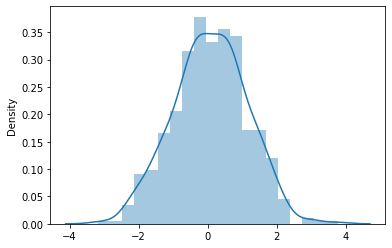

In [12]:
import seaborn as sns
sns.distplot(distribution)

In [13]:
hidden_bias = {
  'hidden': tf.Variable(tf.random.normal([hidden_neurons]), name = 'hidden_bias'),
  'output': tf.Variable(tf.random.normal([output_neurons]), name = 'output_bias')
}

In [14]:
hidden_bias['hidden']

<tf.Variable 'hidden_bias:0' shape=(3,) dtype=float32, numpy=array([ 1.8802884 ,  0.60696477, -0.0223706 ], dtype=float32)>

In [ ]:
hidden_bias['output']